### 1. Biological Neurons

* **Soma (cell body)**: Contains the nucleus and coordinates activity.
* **Dendrites**: Receive electrical signals from other neurons.
* **Axon**: Carry signals from the soma to other cells.
* **Synapses**: Contact points where signals pass to other neurons.

The brain learns by strengthening connections that produce the right outcome, making them more likely to occur in the future.

---

### 2. Artificial Neurons

* Inspired by biological neurons.
* Each artificial neuron receives inputs (x), weights them with numerical values ​​(w weights), and adds a bias.
* Calculate a weighted sum:

$$
z = \sum (w_i \cdot x_i) + b
$$
* Apply an activation function (sigmoid, ReLU, etc.) → which decides whether the neuron "fires" or not.
* The output becomes input for other neurons.

---

### 3. Artificial Neural Networks

* Input layer: receives the raw data.
* Hidden layers: transform the data by applying weights and activation functions.
* Output layer: produces the final result (classification, prediction, etc.).
The forward process is called forward propagation.

---

### 4. Why They Work

* Without activation functions, a network is just a linear regression.
* With activations, it can learn nonlinear relationships, such as recognizing images, translating languages, or generating sounds.
* Learning occurs by adjusting weights using backpropagation, which compares the predicted output with the actual output and corrects errors.

---

📌 **In short**: Biological neurons inspire artificial neurons. The latter perform weighted sums, apply activation functions, and pass the results to other neurons. Layers of connected neurons form a network capable of learning complex tasks.

<img src="../image/nn.PNG" width="300">

### [Keras documentation](https://keras.io/getting_started/about/)

---
### 1. Create the model

```python
from keras import Sequential, layers

model = Sequential()
model.add(layers.Dense(units=64, activation='relu')) # hidden layer
model.add(layers.Dense(units=10, activation='softmax')) # output layer
```

* **Sequential** = a linear stack of layers.
* **Dense** = dense layer (each neuron is connected to all those in the previous layer).
* **relu** = activation function that introduces nonlinearity.
* **softmax** = function that transforms the output into probabilities (for multi-class classification).

---

### 2. Compile the model

```python
model.compile(
loss='categorical_crossentropy',
optimizer='sgd',
metrics=['accuracy']
)
```

* **loss** = function that measures the error (here, multi-class classification).
* **optimizer** = decides how to update the weights (SGD = gradient descent).
* **metrics** = performance metric to monitor (e.g., accuracy).

---

### 3. Train the model

```python
model.fit(x_train, y_train, epochs=5, batch_size=32)
```

* **x\_train** = input data (NumPy array).
* **y\_train** = expected labels/results.
* **epochs=5** = how many times the model "reruns" the entire dataset.
* **batch\_size=32** = how many examples it uses at a time to update the weights.

---

### 4. Evaluate the model

```python
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
```

* Gives you the **loss** and metrics (e.g., accuracy) on the test data.

---

### 5. Use the model to predict

```python
classes = model.predict(x_test, batch_size=128)
```

* Returns the probability that each input belongs to a certain class.

---

So, your `model.fit(...)` piece only works if you have first:

1. created the model (Sequential + layers),
2. compiled the model (with loss, optimizer, and metrics),
3. prepared the `x_train` and `y_train` data as a NumPy array.

---

In [2]:
from keras.datasets import mnist 
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [3]:
from keras import Sequential, layers

model = Sequential()
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

In [4]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Epoch 1/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8494 - loss: 0.5697 - val_accuracy: 0.9087 - val_loss: 0.3271
Epoch 2/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9119 - loss: 0.3119 - val_accuracy: 0.9248 - val_loss: 0.2663
Epoch 3/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9249 - loss: 0.2649 - val_accuracy: 0.9314 - val_loss: 0.2403
Epoch 4/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9335 - loss: 0.2328 - val_accuracy: 0.9401 - val_loss: 0.2130
Epoch 5/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9406 - loss: 0.2085 - val_accuracy: 0.9472 - val_loss: 0.1944


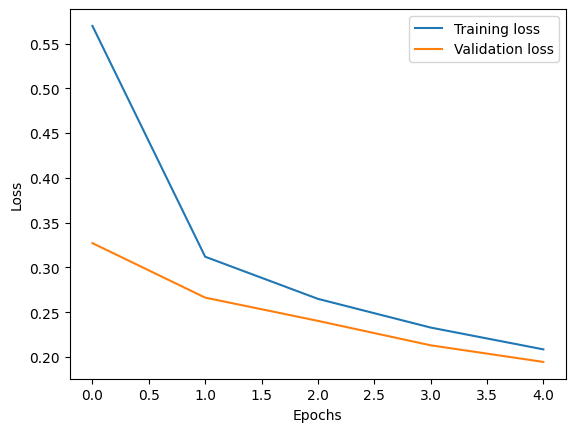

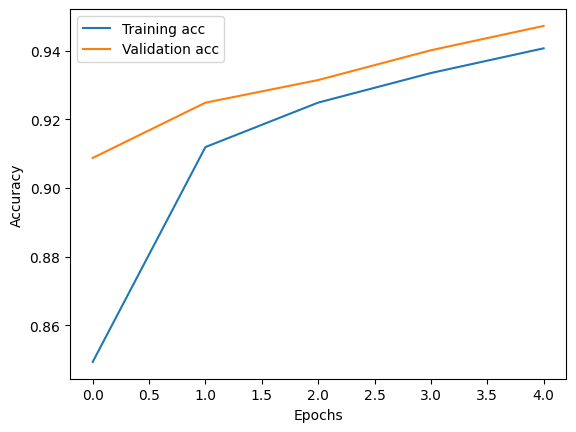

In [5]:
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, epochs=5, batch_size=16, validation_split=0.2) #validation split for validation of los and accuracy

# history.history è un dizionario: {'loss': [...], 'accuracy': [...], 'val_loss': [...], 'val_accuracy': [...]}

# Loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy
plt.plot(history.history['accuracy'], label='Training acc')
plt.plot(history.history['val_accuracy'], label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()